<a href="https://colab.research.google.com/github/codedyasai/SoloProjects/blob/main/%EB%B0%94%EC%9D%B4%EB%9F%B4_%ED%9A%8C%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EB%B6%84%EB%A5%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 분류 프로젝트

# **프로젝트 개요**

## 프로젝트 주제
홍대역 인근 상권에서 효과적인 영업을 위한 고객 세그멘테이션 및 분류 프로젝트

---
## 프로젝트의 배경
- 기존의 영업 방식 : 직접 마케팅(Direct Marketing)
- 직접 마케팅의 문제점 인식과 개선 요구
  - 낮은 성공률과 높은 비용 => 효율적인 마케팅을 위한 전략의 니즈
  - Spray and Pray => 과학적인 접근으로 고객을 특정하는 방법의 니즈

---
## 프로젝트의 목적
- 영업 성공률을 개선할 수 있는 구체적인 방법
- 고객을 세분화 하여 계약 가능성(70% 이상)이 높은 고객을 분류하는 프로그램 생성
- 생성된 프로그램을 활용하여 잠재 고객을 선정


# **프로젝트 범위**
---

## 포함 사항
- 누적 고객 정보 데이터
- 추가 수집된 외부 데이터
- 계약이 성사된 고객과 비성사된 고객을 분류하는데 영향을 미쳤을 것이라 예상할 수 있는 특성을 식별
- 고객 세그먼트 정의 및 분류 모델 개발
- 타겟 마케팅 전략 수립 및 실행
---

## 제외 사항
- 홍대역 인근 이외 지역 제외 (누적 데이터 범위)

# **프로젝트 자원**
---

## 데이터

- 기존 고객의 정보
  - 매장 명칭
  - 매출액
  - 주소

- 네이버
  - 매장 명칭
  - 주소
  - 평균 메뉴 가격
  - 방문자 리뷰수
  - 블로그 리뷰수
  - 지난1달간 후기수
  - 평점
  - 주차 가능 여부
  - 평당임대료

- 오픈업
  - 매출액
  - 면적
  - 시간대별 결제 빈도
  - 요일별 결제 빈도
  - 연령대별 정보
  - 성별 정보

## 인력 자원
- 데이터 사이언티스트 2명
- 마케팅 전문가 1명
- 프로젝트 매니저 1명

## 기술적 자원
- 클라우드 플랫폼(AWS)
- 파이썬 작업 환경
- SQL





# **개발 계획**

## 자원의 확보
- 인력자원 및 기술적 자원은 내부에서 충족
- 네이버, 오픈업 에서 확보할 데이터는 API나 인력을 활용해 수집

## 데이터 전처리
- 데이터 정제 : 분석에 용이한 형태로 처리
- 데이터 변환 : 파생변수 생성 및 요약데이터 생성
- EDA : 효과적인 분석을 위한 탐색

## 모델 생성
- 분류 모델기 사용 : 부스팅 계열, 보팅 및 스태킹
- 평가지표 : 정확도

## 검토 계획
- 분석된 모델을 마케팅 전문가가 검토하여 구체적이고 전문적인 인사이트 도출
- 모델이 도출한 예상 고객 리스트로 테스트 마케팅을 수행하여 실제 계약 성사율을 검토
- 검토 후 개선의 증거를 찾지 못할 경우 개발과정을 다시 수행

# **프로젝트 결과물**

1. 세그먼테이션 및 분류 모델
2. 타겟 마케팅 전략 보고서
3. 문서화된 코드와 사용 설명서

# **분석**

## **모듈 및 데이터 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#03071e", "#370617", "#6a040f", "#9d0208", "#d00000", "#dc2f02", "#e85d04", "#f48c06", "#faa307", "#ffba08"]
cmap_name = "custom_cmap"

team2cmap = LinearSegmentedColormap.from_list('team2cmap', colors, N= 100)

In [ ]:
# 시각화 함수

import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

def visualizer(type, data, x, y= []):

    # 고유 컬러맵 설정

    team2colors = ["#03071e", "#370617", "#6a040f", "#9d0208", "#d00000", "#dc2f02", "#e85d04", "#f48c06", "#faa307", "#ffba08"]
    team2cmap = LinearSegmentedColormap.from_list('team2cmap', team2colors, N=100)

    if type == 'pie':
        fig = px.pie(data, values= data[x].value_counts(),
                     names= data[x].value_counts().index,
                     color_discrete_sequence= team2colors)

        fig.update_traces(textposition='inside', textinfo='percent+label', textfont=dict(size=14))
        fig.update_layout(width=1000, height=600, title_text=f'{x} Pie Chart', font=dict(size=14))
        fig.show()

    elif type == 'scatter':
        fig = px.scatter(data, x= x, y= y, template= 'plotly_white', color= y, color_continuous_scale=team2colors)

        fig.update_layout(width=1000, height=600, title_text=f'{x}와 {y}의 Scatter Plot', font=dict(size=14))
        fig.show()

    elif type == 'hist':
        fig = px.histogram(data, x=x, nbins=len(data[x].unique()),
                           color_discrete_sequence=team2colors ,template='plotly_white', text_auto=True)

        fig.update_layout(width=1000, height=600, title_text=f'{x}의 히스토그램', font=dict(size=14))
        fig.show()


    else:
        print('visualizer(type= 그래프 타입, data= 사용 데이터프레임, x= x축, y= y축)')
        print('type: hist, scatter, pie / 한 컬럼 사용시 x만 입력')
        return

In [ ]:
data = pd.read_csv('marketing.csv', encoding='euc-kr')

In [ ]:
data.head()

,ID,영업기간,주소,면적,평당임대료,타입,평균메뉴가격,방문자리뷰 수,블로그리뷰 수,총 리뷰 수,지난 1달간 후기 수,평점,월매출,주차가능여부,고객여부
0,헤도네,48,서울 마포구 성미산로 165-6 지층 헤도네,2,99,양식,16000,161,221,382,96,5.00,2100,1,0
1,볼빨간꽃돼지,115,서울 마포구 서강로9길 56 송우빌딩 102호,3,78,육류,19000,482,545,1027,467,5.00,1500,0,1
2,이양권반상 홍대본점,3,서울 마포구 와우산로29다길 10 이양권반상,3,44,한식,17000,580,470,1050,278,5.00,1600,1,1
3,우미집 1947,99,서울 마포구 성미산로 153-9,3,113,한식,16000,317,120,437,227,4.99,2100,1,0
4,업투미,73,서울 마포구 성미산로29길 29-9,3,129,양식,27000,319,157,476,88,4.91,1200,0,1


In [ ]:
X = data.iloc[:, 1:-1]
y = data['고객여부']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   영업기간         149 non-null    int64  
 1   주소           149 non-null    object 
 2   면적           149 non-null    int64  
 3   평당임대료        149 non-null    int64  
 4   타입           149 non-null    object 
 5   평균메뉴가격       149 non-null    int64  
 6   방문자리뷰 수      149 non-null    object 
 7   블로그리뷰 수      149 non-null    int64  
 8   총 리뷰 수       149 non-null    int64  
 9   지난 1달간 후기 수  149 non-null    int64  
 10  평점           149 non-null    float64
 11  월매출          149 non-null    int64  
 12  주차가능여부       149 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 15.3+ KB


In [ ]:
X.columns

Index(['영업기간', '주소', '면적', '평당임대료', '타입', '평균메뉴가격', '방문자리뷰 수', '블로그리뷰 수',
       '총 리뷰 수', '지난 1달간 후기 수', '평점', '월매출', '주차가능여부'],
      dtype='object')

## 오브젝트 타입 정리
- 주소 => 제거
- 총리뷰 수 => 제거
- 타입 => 원-핫 인코딩
- 방문자리뷰수 => 정수화

In [ ]:
del X['주소']
del X['총 리뷰 수']
X = pd.get_dummies(data=X, columns=['타입'])
X['방문자리뷰 수'] = X['방문자리뷰 수'].apply(lambda x: int(x.replace(",", "")))
X['방문자리뷰 수'] = X['방문자리뷰 수'].astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   영업기간         149 non-null    int64  
 1   면적           149 non-null    int64  
 2   평당임대료        149 non-null    int64  
 3   평균메뉴가격       149 non-null    int64  
 4   방문자리뷰 수      149 non-null    int64  
 5   블로그리뷰 수      149 non-null    int64  
 6   지난 1달간 후기 수  149 non-null    int64  
 7   평점           149 non-null    float64
 8   월매출          149 non-null    int64  
 9   주차가능여부       149 non-null    int64  
 10  타입_경양식       149 non-null    uint8  
 11  타입_남미        149 non-null    uint8  
 12  타입_동남아       149 non-null    uint8  
 13  타입_버거        149 non-null    uint8  
 14  타입_베이커리      149 non-null    uint8  
 15  타입_분식        149 non-null    uint8  
 16  타입_양식        149 non-null    uint8  
 17  타입_육류        149 non-null    uint8  
 18  타입_인도        149 non-null    uint8  
 19  타입_일식   

# EDA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [ ]:
visualizer('pie', X, '면적')

In [ ]:
visualizer('scatter', X, '방문자리뷰 수', '블로그리뷰 수')

In [ ]:
visualizer('scatter', X, '블로그리뷰 수', '월매출')

In [ ]:
visualizer('hist', X, '월매출')

## **모델링**

In [ ]:
# 훈련 / 테스트 분할
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.1, stratify=y)

#ss = StandardScaler()
#X_train_ss = ss.fit_transform(X_train)
#X_test_ss = ss.transform(X_test)

#pca = PCA()
#X_train_pca = pca.fit_transform(X_train_ss, y_train)
#X_test_pca = pca.transform(X_test_ss)

#lda = LinearDiscriminantAnalysis()
#X_train_lda = lda.fit_transform(X_train_ss, y_train)
#X_test_lda = lda.transform(X_test)

# 메서드
# X, y 자리에 훈련용 데이터를 입력
# model에는 모델 메서드를 문자열로 입력. 예) 'RandomForestClassifier'

def modeling(X, y, model):

    # 검증용 세트 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2, stratify=y)

    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.transform(X_test)

    # 평가 점수를 담을 데이터프레임 생성
    scores = pd.DataFrame()

    # 모델 생성
    g_model = globals()[model]()

    # 모델 감지
    if model == 'KNeighborsClassifier':

        param_grid = {'n_neighbors':[3,5,7,9],
                      'algorithm':['auto', 'ball_tree','kd_tree','brute'],
                      'metric':['euclidean','manhattan','minkowski']}
        scores['model'] = ['Knn']

    elif model == 'SVC':

        param_grid = {'C': [1.0, 10.0],
                       'kernel': ['linear', 'rbf'],
                       'gamma': ['scale', 'auto']}
        scores['model'] = ['SVC']

    elif model == 'LogisticRegression':

        param_grid = {'penalty':['l1','l2','elasticnet',None],
                      'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                      'solver':['lbfgs','liblinear']}
        scores['model'] = ['Logistic classifier']

    elif model == 'RandomForestClassifier':

        param_grid = {'n_estimators': [50, 100, 200],
                      'max_depth': [None, 3, 5],
                      'max_features': ['auto', 'sqrt'],
                      'bootstrap': [True, False]}
        scores['model'] = ['Random forest']

    elif model == 'GradientBoostingClassifier':

        param_grid = {'loss': ['log_loss', 'exponential'],
                     'learning_rate': [0.01, 0.1, 1.0, 10],
                     'criterion': ['friedman_mse', 'squared_error']}

        scores['model'] = ['Gradient Boost Classifier']

    elif model == 'HistGradientBoostingClassifier':

        param_grid = {'max_iter': [100, 200, 300],
                      'max_depth': [3, 5],
                      'learning_rate': [0.01, 0.1, 1.0, 10.0]}
        scores['model'] = ['Hist Random forest']

    elif model == 'XGBClassifier':

        param_grid = {'n_estimators': [50, 100, 200],
                      'max_depth': [3, 4, 5],
                      'learning_rate': [0.01, 0.1, 10.0]}
        scores['model'] = ['XG Boost']

    elif model == 'LGBMClassifier':

        param_grid = {'n_estimators':[100, 200, 500],
                     'learning_rate': [0.01, 0.1, 1.0, 10],
                     'max_depth':[1,2,3]}
        scores['model'] = ['Light GBM']

    else:
        print('잘못된 입력입니다.')
        return

    # 그리드 서치 모델링
    gs = GridSearchCV(estimator=g_model, param_grid=param_grid,
                      scoring='accuracy', cv=5, refit=True, n_jobs=-1)

    gs = gs.fit(X_train, y_train)

    best = gs.best_estimator_
    best.fit(X_train, y_train)
    pred_train = best.predict(X_train)
    pred_test = best.predict(X_test)

    scores['Best_parameters'] = [gs.best_params_]

    scores['Accuracy_Train'] = accuracy_score(y_train, pred_train)
    scores['Accuracy_Test'] = accuracy_score(y_test, pred_test)

    scores['Recall_Train'] = recall_score(y_train, pred_train)
    scores['Recall_Test'] = recall_score(y_test, pred_test)

    scores['F1_Train'] = f1_score(y_train, pred_train)
    scores['F1_Test'] = f1_score(y_test, pred_test)

    scores['Precision_Train'] = precision_score(y_train, pred_train)
    scores['Precision_Test'] = precision_score(y_test, pred_test)

    ConfusionMatrixDisplay.from_estimator(best, X, y)
    plt.title( scores['model'].values[0])
    plt.show()

    return scores


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


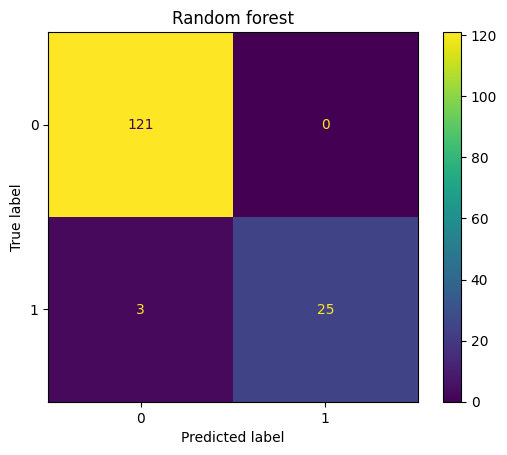

In [ ]:
rf_scores = modeling(X, y, model='RandomForestClassifier')

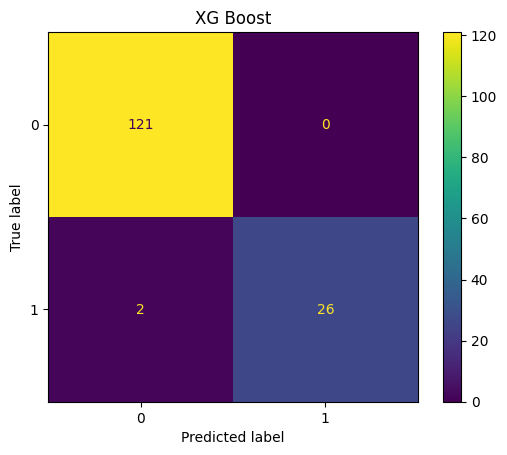

In [ ]:
xgb_scores = modeling(X, y, model='XGBClassifier')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22, number of negative: 97
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 119, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.184874 -> initscore=-1.483669
[LightGBM] [Info] Start training from score -1.483669
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22, number of negative: 97
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 119, number of used features: 11
[Lig

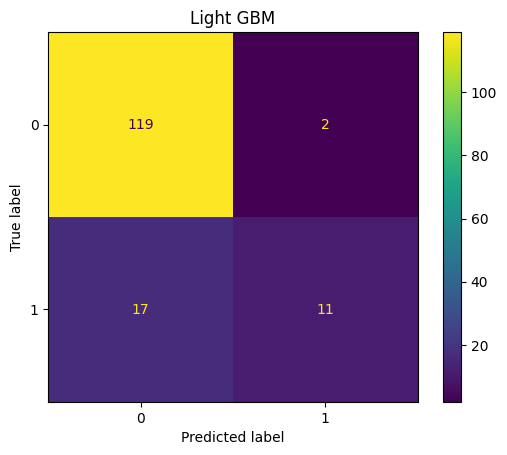

In [ ]:
# X, y 조합선택 => (X_train, y_train), (X_train_pca, y_train), (X_train_lda, y_train)
lgb_scores = modeling(X, y, model='LGBMClassifier')

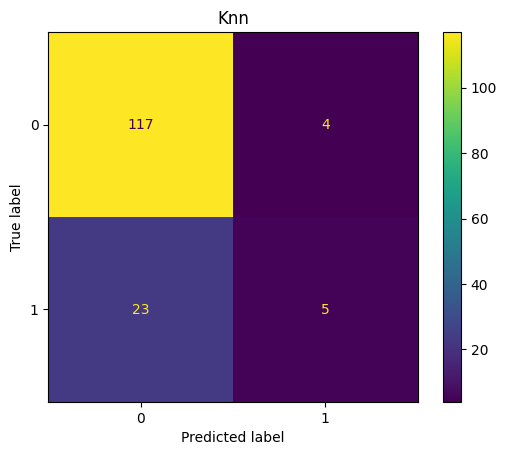

In [ ]:
knn_scores = modeling(X, y, model = 'KNeighborsClassifier')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

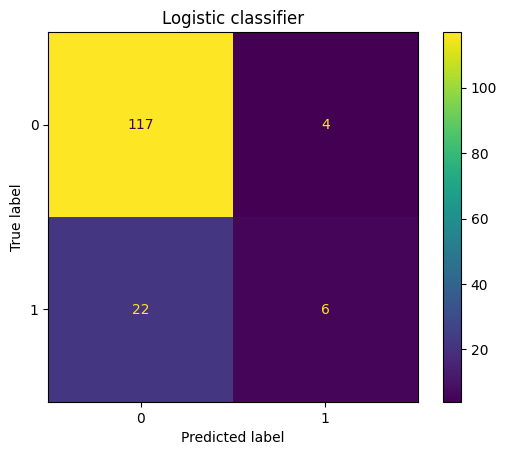

In [ ]:
lr_scores = modeling(X, y, model = 'LogisticRegression')

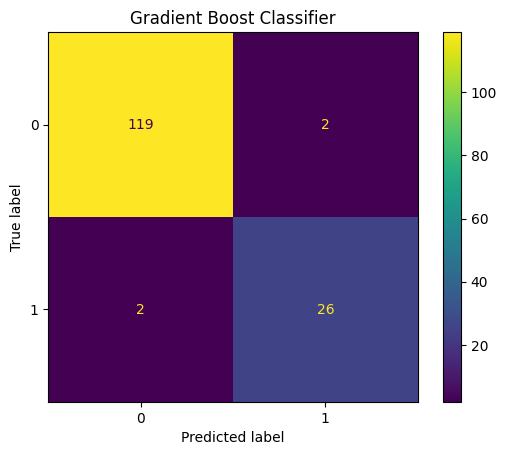

In [ ]:
gbc_scores = modeling(X, y, model = 'GradientBoostingClassifier')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


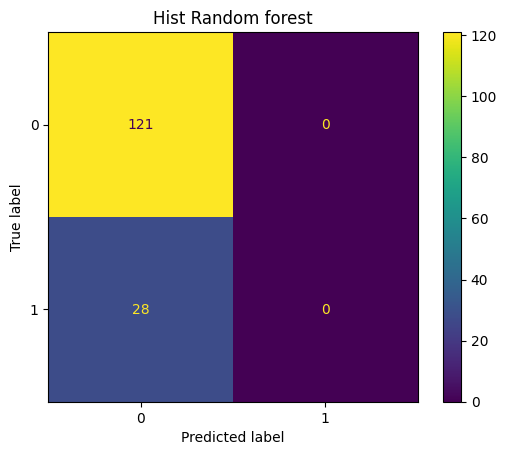

In [ ]:
hgbc_scores = modeling(X, y, model = 'HistGradientBoostingClassifier')

In [ ]:
result = pd.concat([rf_scores, xgb_scores, lgb_scores, knn_scores, lr_scores, gbc_scores, hgbc_scores], axis=0)

In [ ]:
result

,model,Best_parameters,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,F1_Train,F1_Test,Precision_Train,Precision_Test
0,Random forest,"{'bootstrap': False, 'max_depth': None, 'max_f...",1.000000,0.900000,1.000000,0.500000,1.000000,0.666667,1.000,1.000000
0,XG Boost,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",1.000000,0.933333,1.000000,0.666667,1.000000,0.800000,1.000,1.000000
0,Light GBM,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.865546,0.900000,0.363636,0.500000,0.500000,0.666667,0.800,1.000000
0,Knn,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.815126,0.833333,0.136364,0.333333,0.214286,0.444444,0.500,0.666667
0,Logistic classifier,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.831933,0.800000,0.227273,0.166667,0.333333,0.250000,0.625,0.500000
0,Gradient Boost Classifier,"{'criterion': 'friedman_mse', 'learning_rate':...",1.000000,0.866667,1.000000,0.666667,1.000000,0.666667,1.000,0.666667
0,Hist Random forest,"{'learning_rate': 0.01, 'max_depth': 3, 'max_i...",0.815126,0.800000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000


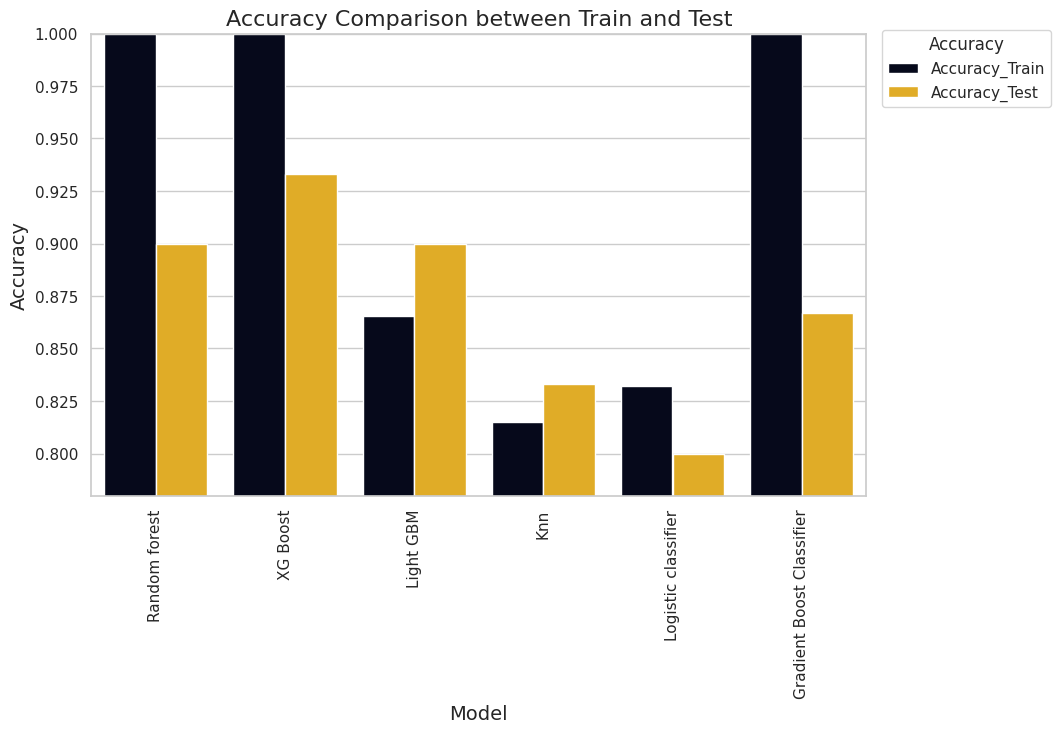

In [ ]:
data = {
    'model': ['Random forest', 'XG Boost', 'Light GBM', 'Knn', 'Logistic classifier', 'Gradient Boost Classifier'],
    'Accuracy_Train': [1.000000, 1.000000, 0.865546, 0.815126, 0.831933, 1.000000],
    'Accuracy_Test': [0.900000, 0.933333, 0.900000, 0.833333, 0.800000, 0.866667]
}

result = pd.DataFrame(data)

# Seaborn을 사용하여 바 그래프 그리기
sns.set(style="whitegrid")  # 스타일 설정 (생략 가능)
plt.figure(figsize=(10, 6))  # 그래프 크기 설정 (생략 가능)

# 'model'을 x축, 'Accuracy_Train'과 'Accuracy_Test'를 y축으로 하는 바 그래프 그리기
sns.barplot(x='model', y='value', hue='variable', data=pd.melt(result, id_vars='model'), palette=["#03071e", "#ffba08"])

# 그래프의 제목과 라벨 설정 (생략 가능)
plt.title('Accuracy Comparison between Train and Test', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# 범례 설정 (생략 가능)
plt.legend(title='Accuracy', loc=(1.02,0.84))
plt.xticks(rotation=90)
plt.ylim(0.78, 1)

# 그래프 표시
plt.show()


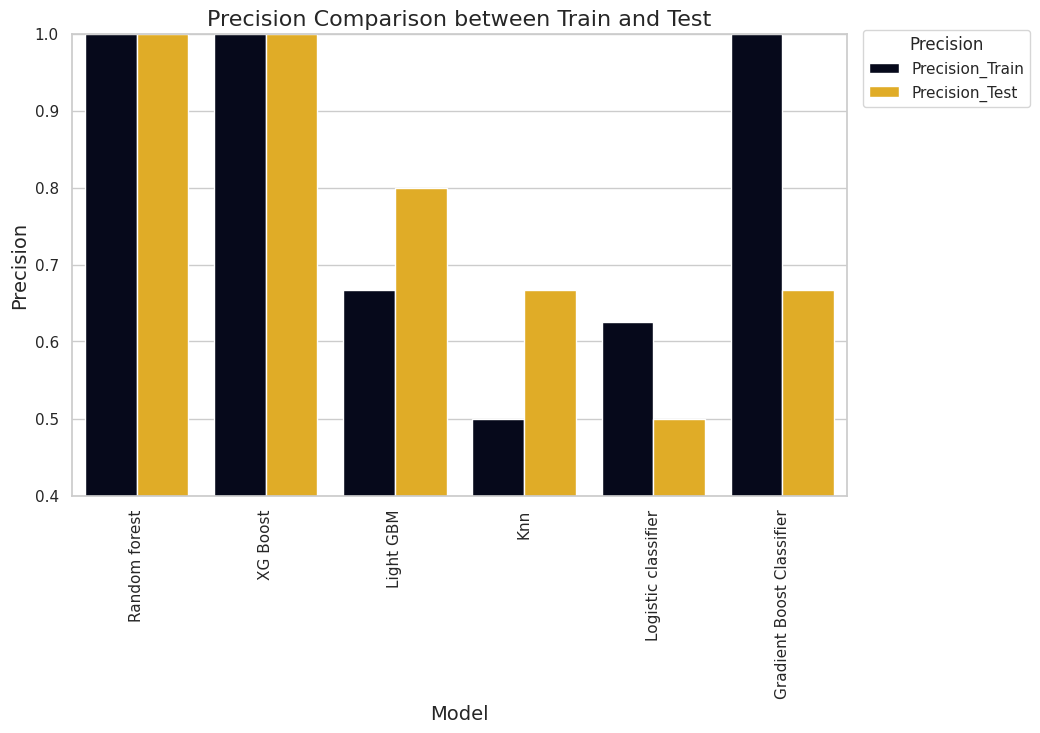

In [ ]:
data = {
    'model': ['Random forest', 'XG Boost', 'Light GBM', 'Knn', 'Logistic classifier', 'Gradient Boost Classifier'],
    'Precision_Train': [1.000, 1.000, 0.666667, 0.5, 0.625, 1.000],
    'Precision_Test': [1.000, 1.000, 0.8, 0.666667, 0.5, 0.666667]
}

result = pd.DataFrame(data)

# Seaborn을 사용하여 바 그래프 그리기
sns.set(style="whitegrid")  # 스타일 설정 (생략 가능)
plt.figure(figsize=(10, 6))  # 그래프 크기 설정 (생략 가능)

# 'model'을 x축, 'Accuracy_Train'과 'Accuracy_Test'를 y축으로 하는 바 그래프 그리기
sns.barplot(x='model', y='value', hue='variable', data=pd.melt(result, id_vars='model'), palette=["#03071e", "#ffba08"])

# 그래프의 제목과 라벨 설정 (생략 가능)
plt.title('Precision Comparison between Train and Test', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Precision', fontsize=14)

# 범례 설정 (생략 가능)
plt.legend(title='Precision', loc=(1.02,0.84))
plt.xticks(rotation=90)
plt.ylim(0.4, 1)

# 그래프 표시
plt.show()

# 모델

In [ ]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# 새 데이터 넣어도 자동으로 전처리 & 기존에 학습한 모델로 분류시키기

In [ ]:
def classify(newdata):
    newdata = newdata.iloc[:, 1:-1]

    del newdata['주소']
    del newdata['총 리뷰 수']
    newdata = pd.get_dummies(data= newdata, columns=['타입'])
    newdata['방문자리뷰 수'] = newdata['방문자리뷰 수'].astype(int)

    # 새로운 데이터에 학습 데이터의 컬럼 순서와 일치시킴
    newdata = newdata.reindex(columns= X.columns, fill_value=0)


    return print('새 데이터 분류 결과: ', xgb.predict(newdata))